# Double 7's Portfolio
    
    (Optimize period and weighting scheme)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
# Symbol Lists
SP500_Sectors = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
Mixed_Asset_Classes = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
FANG_Stocks = ['FB', 'AMZN', 'NFLX', 'GOOG']
Stocks_Bonds_Gold = ['SPY', 'QQQ', 'TLT', 'GLD']

# Pick one of the above
symbols = Stocks_Bonds_Gold


capital = 10000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 0.15,
    'margin' : 3,
    'period' : 7,
    'use_regime_filter' : True,
    'use_vola_weight' : True
}

Define Optimizations

In [5]:
# pick one
optimize_period           = True
optimize_use_vola_weight  = False
optimize_stop_loss_pct    = False


if optimize_period:
    Xs = range(3, 18+1, 1)
    Xs = [str(X) for X in Xs]

elif optimize_use_vola_weight:
    Xs = (0, 1)
    Xs = [str(X) for X in Xs]

elif optimize_stop_loss_pct:
    Xs = range(5, 31, 1)
    Xs = [str(X) for X in Xs]

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print(X, end=" ")
    if optimize_period:
        options['period'] = int(X)
    elif optimize_use_vola_weight:
        options['use_vola_weight'] = False if X == '0' else True
    elif optimize_stop_loss_pct:
        options['stop_loss_pct'] = int(X)/100
    
    strategies[X] = strategy.Strategy(symbols, capital, start, end, options)
    strategies[X].run()

3 STOP LOSS!!!
STOP LOSS!!!
4 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
5 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
6 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
7 STOP LOSS!!!
STOP LOSS!!!
8 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
9 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
10 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
11 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
12 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
13 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
14 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
15 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
16 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
17 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
18 STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!
STOP LOSS!!!


Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = pf.optimizer_summary(strategies, metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
annual_return_rate,11.32,13.09,14.54,17.13,17.04,16.06,14.32,14.44,15.74,12.77,11.57,12.82,11.93,12.26,11.53,11.45
max_closed_out_drawdown,-24.17,-23.70,-23.56,-21.17,-16.79,-25.89,-25.87,-28.27,-28.25,-31.03,-31.09,-27.86,-27.88,-25.68,-25.66,-25.70
annualized_return_over_max_drawdown,0.47,0.55,0.62,0.81,1.02,0.62,0.55,0.51,0.56,0.41,0.37,0.46,0.43,0.48,0.45,0.45
best_month,16.36,21.88,27.10,29.78,20.92,28.05,28.05,31.02,32.15,29.57,25.99,24.64,24.84,24.85,24.88,24.86
worst_month,-24.17,-23.70,-23.56,-19.04,-14.76,-25.89,-25.87,-28.00,-27.98,-31.03,-31.09,-27.86,-27.88,-25.16,-25.14,-25.18
sharpe_ratio,0.71,0.79,0.85,0.98,0.97,0.91,0.83,0.84,0.91,0.77,0.69,0.76,0.73,0.75,0.73,0.73
sortino_ratio,0.73,0.85,0.93,1.09,1.06,0.97,0.88,0.89,0.97,0.82,0.74,0.82,0.79,0.81,0.78,0.78
monthly_std,3.98,3.98,3.94,3.76,3.86,3.98,4.10,4.12,4.03,3.97,4.05,4.06,4.02,3.88,3.84,3.77
pct_time_in_market,68.91,70.09,69.09,67.79,67.59,67.30,67.39,68.10,68.03,68.23,68.64,67.54,68.72,67.93,67.44,66.81
total_num_trades,1608.00,1129.00,872.00,713.00,593.00,523.00,455.00,408.00,365.00,323.00,296.00,278.00,258.00,238.00,225.00,210.00


Bar graphs

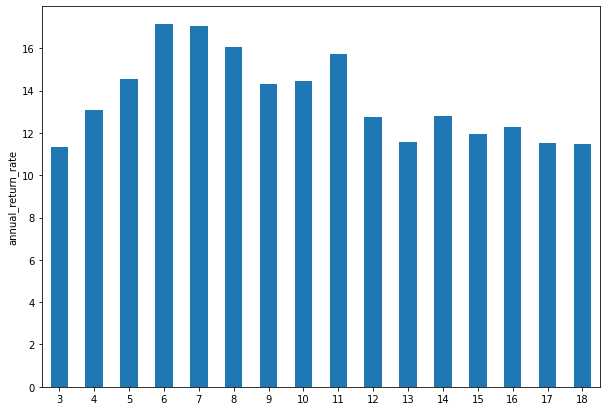

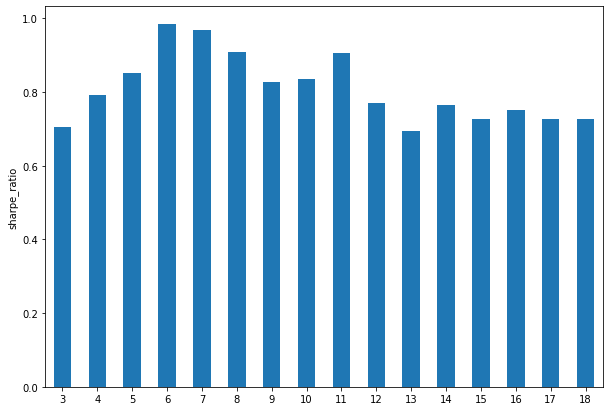

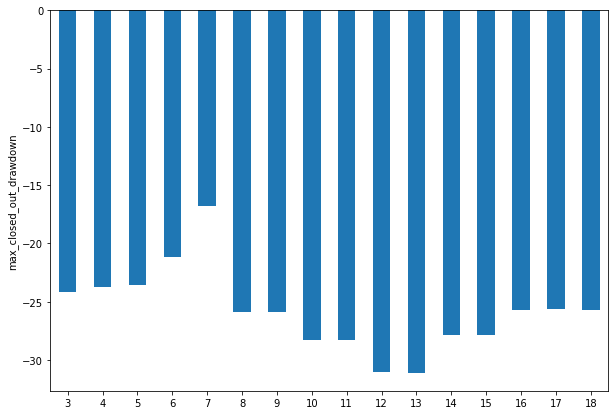

In [8]:
pf.optimizer_plot_bar_graph(df, 'annual_return_rate')
pf.optimizer_plot_bar_graph(df, 'sharpe_ratio')
pf.optimizer_plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()

Equity curve

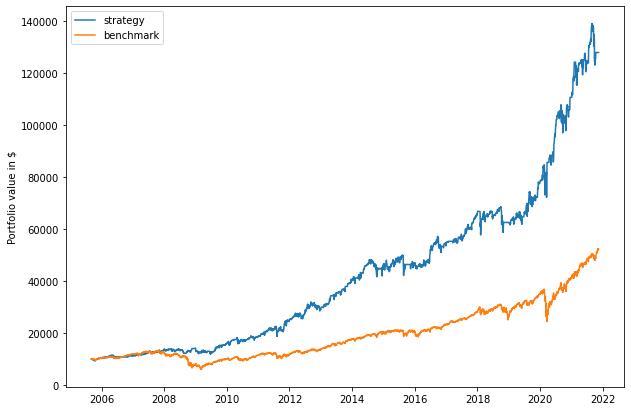

In [10]:
if   optimize_period: Y = '7'
elif optimize_use_vola_weight: Y = '1'
elif optimize_stop_loss_pct: Y = '15'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)

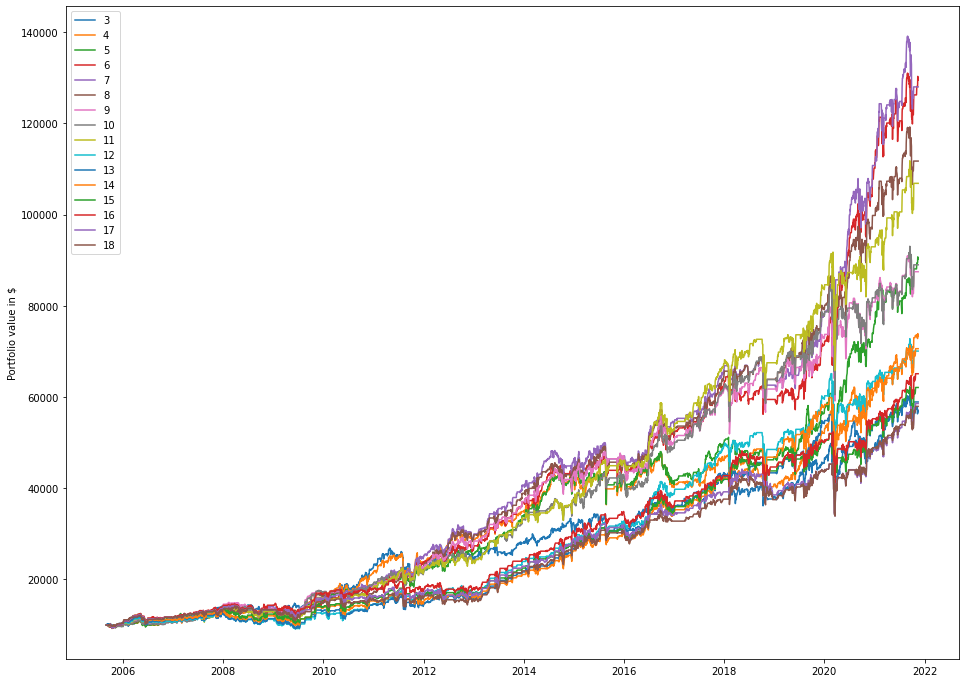

In [11]:
labels = []
for strategy in strategies:
    if optimize_period:
        label = strategy.options['period']
    elif optimize_use_vola_weight:
        label = strategy.options['use_vola_weight']
    elif optimize_stop_loss_pct:
        label = strategy.options['stop_loss_pct']
    labels.append(label)

pf.plot_equity_curves(strategies, labels)